In [6]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
#reading the dataset
data=pd.read_csv("1_boston_housing.csv")

In [9]:
#dataset 
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
#checking null values
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [11]:
x=data.drop('MEDV',axis=1)

In [12]:
y=data['MEDV']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [15]:
#model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128,input_shape = (13,),activation = 'relu',name='dense_1'))
model.add(Dense(64,activation = 'relu',name = 'dense_2'))
model.add(Dense(1,activation='linear',name='dense_output'))

model.compile(optimizer = 'adam',loss='mse',metrics=['mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
11/11 [==============================] - 2s 39ms/step - loss: 566.4629 - mae: 22.0231 - val_loss: 501.6475 - val_mae: 20.2613
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 494.2646 - mae: 20.2130 - val_loss: 427.3682 - val_mae: 18.3988
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 410.7095 - mae: 17.9905 - val_loss: 334.5360 - val_mae: 16.0436
Epoch 4/50
11/11 [==============================] - 0s 9ms/step - loss: 303.5666 - mae: 15.1469 - val_loss: 227.4559 - val_mae: 12.8787
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 188.7720 - mae: 11.6689 - val_loss: 124.3719 - val_mae: 9.2004
Epoch 6/50
11/11 [==============================] - 0s 12ms/step - loss: 93.8054 - mae: 7.8465 - val_loss: 63.2167 - val_mae: 6.3375
Epoch 7/50
11/11 [==============================] - 0s 8ms/step - loss: 54.1262 - mae: 5.6869 - val_loss: 48.2166 - val_mae: 4.9050
Epoch 8/50
11/11 [==============================] - 0s 

In [17]:
mse,mae=model.evaluate(x_test,y_test)
print("mse:",mse)
print("mae:",mae)

4/4 [==============================] - 0s 2ms/step - loss: 11.9717 - mae: 2.7714
mse: 11.971702575683594
mae: 2.771353244781494


In [18]:
y_pred = model.predict(x_test[:])

4/4 [==============================] - 0s 2ms/step


In [19]:
p=[]
for i in y_pred:
    p.append(list(i)[0])

In [20]:
d = pd.DataFrame({'actual':y_test,'predicted':p})
d

,actual,predicted
307,28.2,28.614225
343,23.9,22.261560
47,16.6,21.126184
67,22.0,24.020861
362,20.8,21.498308
...,...,...
92,22.9,24.230425
224,44.8,42.906040
110,21.7,20.079691
426,10.2,14.542186


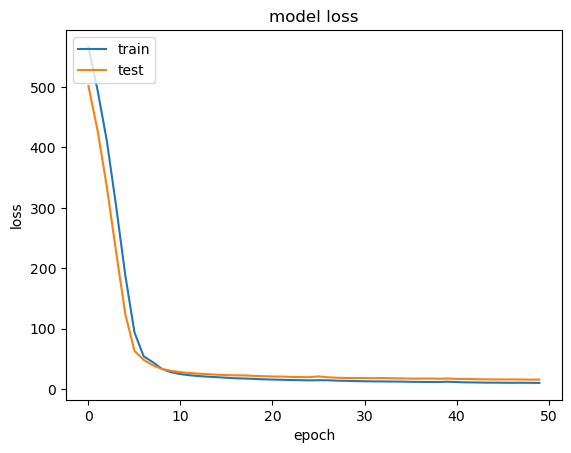

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

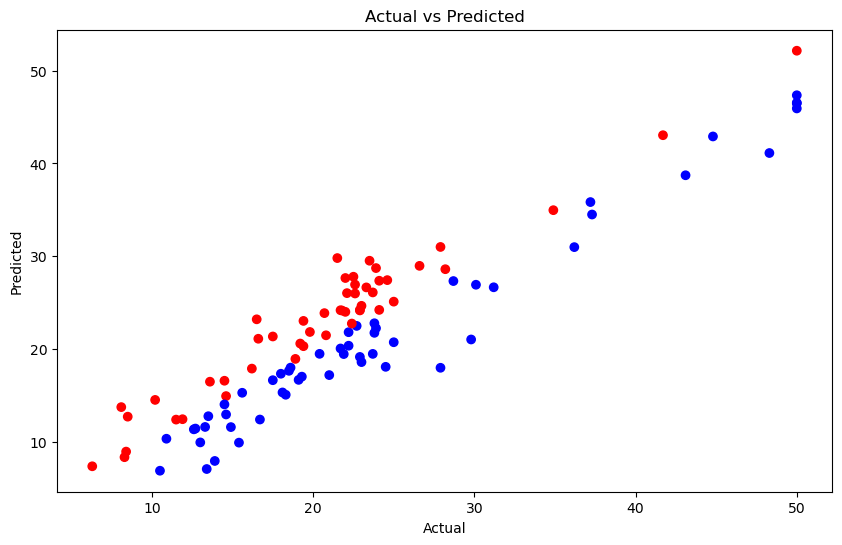

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_test contains the actual values and p contains the predicted values
d = pd.DataFrame({'Actual': y_test, 'Predicted': p})

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(d['Actual'], d['Predicted'], c=['blue' if a > p else 'red' for a, p in zip(d['Actual'], d['Predicted'])])
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
